# Plot result of Inference of a Network Structure


### Import libraries and parameters

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors


# Changable variables
Model_Name = "LF"


# Define the input and output shapes
input_shape = (200, 10)  # Shape of the input data
output_units = 10 * 10  # Number of output units


test_sample_number = int(313)


### create custom color map

In [8]:
# Define the colors for the custom cyclic colormap
colors = [
    (1.0, 0.0, 1.0),  # Magenta (255, 0, 255)
    (1.0, 0.0, 0.0),  # Red (255, 0, 0)
    #(1.0, 0.5, 0.0),  # Orange (255, 128, 0)
    (1.0, 1.0, 0.0),  # Yellow (255, 255, 0)
    (0.0, 1.0, 0.0),  # Green (0, 255, 0)
    (0.0, 1.0, 1.0),  # Cyan (0, 255, 255)
    (0.0, 0.0, 1.0),  # Blue (0, 0, 255)
    (1.0, 0.0, 1.0)   # Magenta (255, 0, 255)
]
# Create the custom cyclic colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

### Plot a test input sample

In [ ]:
fig = plt.figure()
#_________________________________________________________
# Read one of the input test data
with open(f"./Test data/phases/Phase_snapshot_N29_J20.000000_S{test_sample_number}.dat") as textFile:         
    lines = [line.split() for line in textFile]

lines = np.array(lines, dtype=float).transpose()  # Convert to numpy array and transpose
print(np.min(lines))
N = len(lines[0])
#plot
plt.imshow(lines, cmap=custom_cmap, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.xlim(0,1)
plt.xlim(0,N)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False,  labelsize=12, labelcolor='#262626')
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False,  labelsize=12, labelcolor='#262626')
plt.ylabel('Node (i)',  fontsize=12, labelpad=12)
plt.xlabel('Time (s)',  fontsize=12)
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])# Reverse the y-axis direction
#_________________________________________________________
plt.gcf().set_size_inches(6, 4)         
plt.savefig(f'./Results/Phase_snapshot_N29_J20.000000_S{test_sample_number}.png', dpi=300)

### Plot perdiction results

[[4.1040000e-05 5.8546991e-01 3.7635338e-01 6.3504061e-01 4.7376398e-01
  5.6172667e-01 2.6984533e-01 5.8601260e-01 5.3623781e-01 2.8264911e-01]
 [5.8546904e-01 3.7790000e-05 3.7147885e-01 5.6262536e-01 5.1699163e-01
  3.9285410e-01 3.8270544e-01 4.7088573e-01 4.3972942e-01 3.1632755e-01]
 [3.7635394e-01 3.7148004e-01 4.1610000e-05 3.3486965e-01 5.4179518e-01
  4.3824176e-01 5.9986776e-01 3.2362093e-01 5.6475070e-01 3.0279099e-01]
 [6.3504042e-01 5.6262316e-01 3.3486734e-01 3.5880000e-05 5.5736689e-01
  5.2204694e-01 2.8488217e-01 5.4945948e-01 4.3812308e-01 3.0199284e-01]
 [4.7376411e-01 5.1699175e-01 5.4179632e-01 5.5736488e-01 3.6960000e-05
  5.3675458e-01 3.4291019e-01 5.4183062e-01 5.2641772e-01 4.5718343e-01]
 [5.6172680e-01 3.9285388e-01 4.3824217e-01 5.2204837e-01 5.3675440e-01
  3.2820000e-05 5.2666414e-01 5.4471401e-01 5.4354712e-01 2.9075755e-01]
 [2.6984716e-01 3.8270863e-01 5.9986766e-01 2.8488080e-01 3.4291123e-01
  5.2666078e-01 3.8660000e-05 3.5523064e-01 3.9901938e-01 

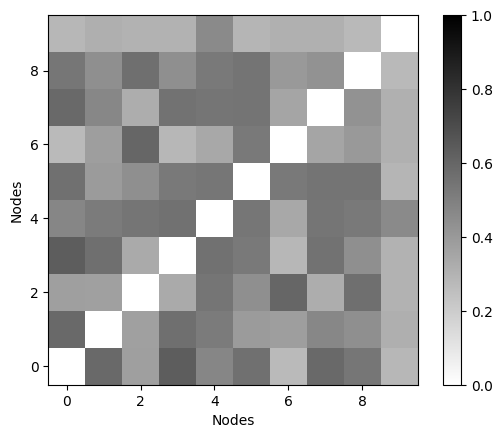

In [ ]:
# Load the data from the text file
data = np.loadtxt('D:/uni/Codes/Inference of network structure/new code/average of predicted values.txt')


# Ensure the data contains exactly 841 values
if data.size != 100:
    raise ValueError("The data does not contain 841 values.")

# Reshape the data into a 29x29 matrix
matrix = data.reshape((10, 10))
print(matrix)

# Plot the matrix with reversed colors (white for links, black for no links)
plt.imshow(matrix, cmap='gray_r', interpolation='none', vmin=0, vmax=1)
plt.colorbar()

# Set axis labels
plt.xlabel('Nodes')
plt.ylabel('Nodes')
# Reverse the y-axis
plt.gca().invert_yaxis()

# Save the plot as a PNG file
plt.savefig('predicted_adj.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Plot comparision matrix

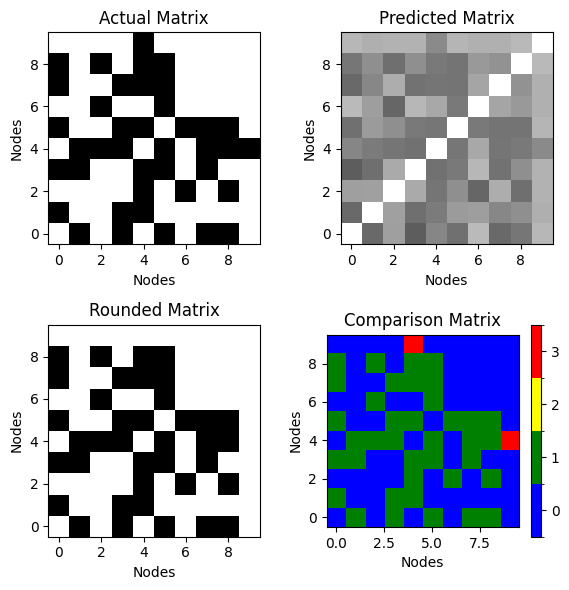

In [ ]:
# Load the actual and predicted matrices (both are 29x29 matrices)
actual_matrix = np.loadtxt('D:/uni/Codes/Inference of network structure/plot results/actual matrix.txt')
predicted_matrix = np.loadtxt('D:/uni/Codes/Inference of network structure/plot results/average of predicted values.txt')

# Reshape the predicted matrix into a 29x29 matrix
predicted_matrix = predicted_matrix.reshape((10, 10))

# Round the predicted matrix: less than 0.5 -> 0, 0.5 or more -> 1
rounded_matrix = np.where(predicted_matrix < 0.5, 0, 1)

# Ensure both matrices have the correct shape (29x29)
if actual_matrix.shape != (10, 10) or rounded_matrix.shape != (10, 10):
    raise ValueError("Both matrices must be 29x29.")

# Create a new matrix to hold the color codes for the comparison matrix
# 0: blue, 1: green, 2: yellow, 3: red
new_matrix = np.zeros_like(actual_matrix, dtype=int)

# Assign values based on the conditions
new_matrix[(actual_matrix == 1) & (rounded_matrix == 1)] = 1  # green
new_matrix[(actual_matrix == 1) & (rounded_matrix == 0)] = 3  # red
new_matrix[(actual_matrix == 0) & (rounded_matrix == 1)] = 2  # yellow
new_matrix[(actual_matrix == 0) & (rounded_matrix == 0)] = 0  # blue

# Define the custom colormap for the comparison matrix
cmap = mcolors.ListedColormap(['blue', 'green', 'yellow', 'red'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Plot the actual matrix
axs[0,0].imshow(actual_matrix, cmap='gray_r', interpolation='none', vmin=0, vmax=1)
axs[0,0].set_title('Actual Matrix')
axs[0,0].set_xlabel('Nodes')
axs[0,0].set_ylabel('Nodes')
axs[0,0].invert_yaxis()

# Plot the predicted matrix
axs[0,1].imshow(predicted_matrix, cmap='gray_r', interpolation='none', vmin=0, vmax=1)
axs[0,1].set_title('Predicted Matrix')
axs[0,1].set_xlabel('Nodes')
axs[0,1].set_ylabel('Nodes')
axs[0,1].invert_yaxis()

# Plot the rounded matrix
axs[1,0].imshow(rounded_matrix, cmap='gray_r', interpolation='none', vmin=0, vmax=1)
axs[1,0].set_title('Rounded Matrix')
axs[1,0].set_xlabel('Nodes')
axs[1,0].set_ylabel('Nodes')
axs[1,0].invert_yaxis()

# Plot the comparison matrix
im = axs[1,1].imshow(new_matrix, cmap=cmap, norm=norm, interpolation='none')
axs[1,1].set_title('Comparison Matrix')
axs[1,1].set_xlabel('Nodes')
axs[1,1].set_ylabel('Nodes')
axs[1,1].invert_yaxis()

# Add a colorbar to the comparison matrix
fig.colorbar(im, ax=axs[1,1], ticks=[0, 1, 2, 3])

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('matrix_comparison.png', dpi=300)
plt.show()
